In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pyuvdata
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/beam_manipulation")
import jones_to_mueller
import importlib
importlib.reload(jones_to_mueller)

<module 'jones_to_mueller' from '/Users/ruby/Astro/rlb_LWA/beam_manipulation/jones_to_mueller.py'>

In [2]:
# Read beam simulation generated by David Woody, from Marin Anderson
beam = jones_to_mueller.read_beam_txt_file('/Users/ruby/Astro/LWA_beams/DW_beamquadranttable20151110.txt', header_line=6)

In [3]:
beam.freq_array[0]

array([20000000., 30000000., 40000000., 50000000., 60000000., 70000000.,
       80000000.])

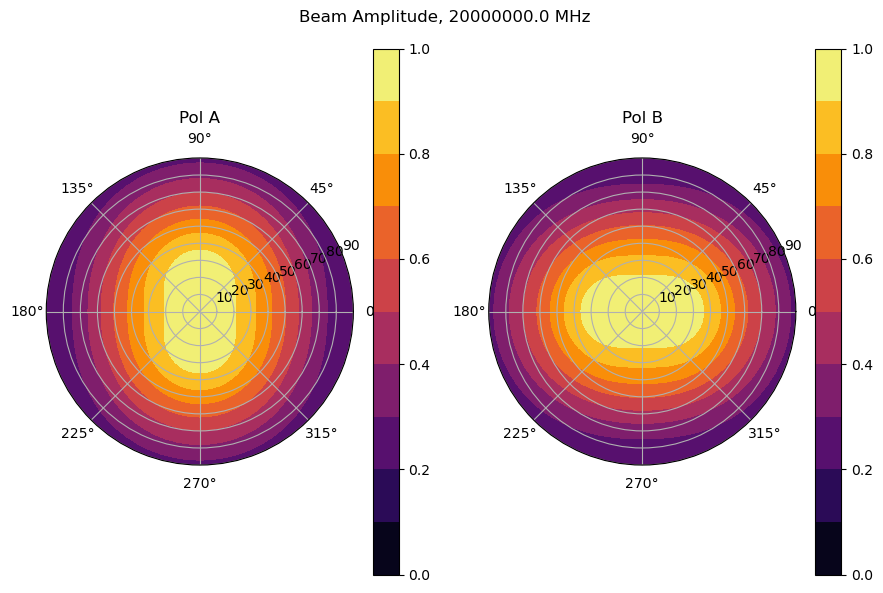

In [4]:
jones_to_mueller.plot_beam(beam, contour_plot=True, plot_amplitude=True, plot_freq=20.*1e6, vmin=0, vmax=1)

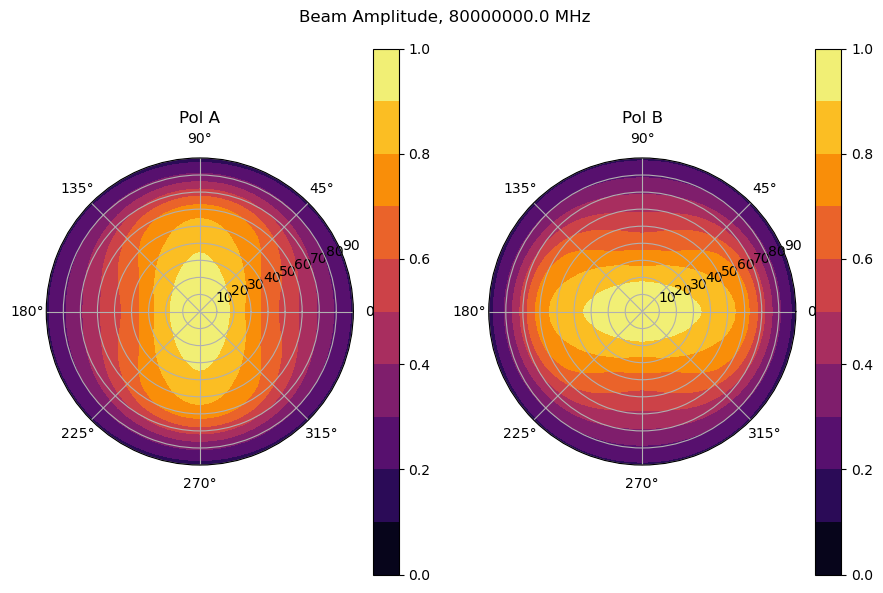

In [5]:
jones_to_mueller.plot_beam(beam, contour_plot=True, plot_amplitude=True, plot_freq=80.*1e6, vmin=0, vmax=1)

In [6]:
for freq in beam.freq_array[0]:
    jones_to_mueller.plot_beam(beam, contour_plot=True, plot_amplitude=True, plot_freq=freq, vmin=0, vmax=1, savepath=f"/Users/ruby/Astro/beam_gifs/lwa_beam_model_{int(freq/1e6)}MHz")

In [7]:
mwa_beam = pyuvdata.UVBeam()
mwa_beam.read_mwa_beam("/Users/ruby/Astro/polarized_source_sims_Feb2022/mwa_full_embedded_element_pattern.h5")
mwa_beam.data_array = np.transpose(mwa_beam.data_array, axes=[2, 1, 0, 3, 4, 5])

In [8]:
mwa_beam.freq_array

array([[4.9920e+07, 5.1200e+07, 5.2480e+07, 5.3760e+07, 5.5040e+07,
        5.6320e+07, 5.7600e+07, 5.8880e+07, 6.0160e+07, 6.1440e+07,
        6.2720e+07, 6.4000e+07, 6.5280e+07, 6.6560e+07, 6.7840e+07,
        6.9120e+07, 7.0400e+07, 7.1680e+07, 7.2960e+07, 7.4240e+07,
        7.5520e+07, 7.6800e+07, 7.8080e+07, 7.9360e+07, 8.0640e+07,
        8.1920e+07, 8.3200e+07, 8.4480e+07, 8.5760e+07, 8.7040e+07,
        8.8320e+07, 8.9600e+07, 9.0880e+07, 9.2160e+07, 9.3440e+07,
        9.4720e+07, 9.6000e+07, 9.7280e+07, 9.8560e+07, 9.9840e+07,
        1.0112e+08, 1.0240e+08, 1.0368e+08, 1.0496e+08, 1.0624e+08,
        1.0752e+08, 1.0880e+08, 1.1008e+08, 1.1136e+08, 1.1264e+08,
        1.1392e+08, 1.1520e+08, 1.1648e+08, 1.1776e+08, 1.1904e+08,
        1.2032e+08, 1.2160e+08, 1.2288e+08, 1.2416e+08, 1.2544e+08,
        1.2672e+08, 1.2800e+08, 1.2928e+08, 1.3056e+08, 1.3184e+08,
        1.3312e+08, 1.3440e+08, 1.3568e+08, 1.3696e+08, 1.3824e+08,
        1.3952e+08, 1.4080e+08, 1.4208e+08, 1.43

In [14]:
#use_freqs = np.arange(50, 300, 10)*1e6
use_freqs = np.arange(260, 330, 10)*1e6
use_freqs = np.array(
    [mwa_beam.freq_array[0, np.argmin(np.abs(mwa_beam.freq_array[0] - freq))] for freq in use_freqs]
)

In [15]:
for freq in use_freqs:
    jones_to_mueller.plot_beam(
        mwa_beam,
        contour_plot=True,
        plot_amplitude=True,
        plot_freq=freq,
        vmin=0,
        vmax=1,
        savepath=f"/Users/ruby/Astro/beam_gifs/mwa_beam_model_{int(freq)}MHz"
    )

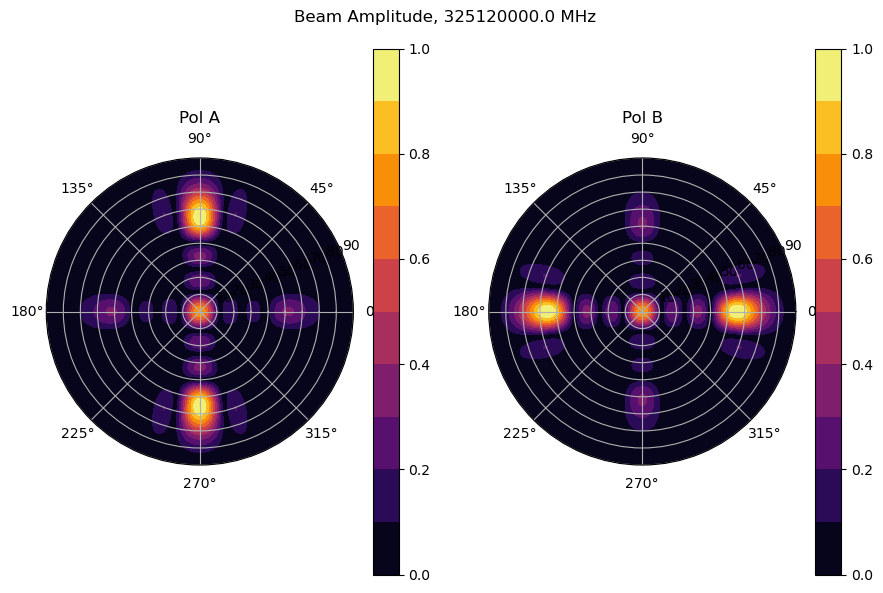

In [12]:
jones_to_mueller.plot_beam(mwa_beam, contour_plot=True, plot_amplitude=True, plot_freq=3.2512e+08, vmin=0, vmax=1)

In [17]:
pyuvdata.__version__

'2.2.11.dev12+ge76516a0'